# KNN Classification

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

<b>load classification sample datasets

In [3]:
from sklearn import datasets


## classification data sets
X, y= datasets.load_breast_cancer(return_X_y=True,as_frame=True) # load the X,y data as dataframes
#X, y= datasets.load_iris(return_X_y=True,as_frame=True)
#X, y= datasets.load_wine(return_X_y=True,as_frame=True)

Information about the [breast-cancer](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) data set

In [4]:
# input variables
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
y = y.apply( lambda x : 1 if x==0 else 0)

In [6]:
# target variable is malignant or benign (binary label).
# let's check the distribution of labels
y.value_counts()

0    357
1    212
Name: target, dtype: int64

### train/test split

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

### Knn_Classification

In [8]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
333,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.760,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.016670,0.2815,0.07418
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,0.06312,...,10.750,20.88,68.09,355.2,0.14670,0.09370,0.040430,0.051590,0.2841,0.08175
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,0.1506,0.05491,...,20.420,25.84,139.50,1239.0,0.13810,0.34200,0.350800,0.193900,0.2928,0.07867
178,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.000,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
85,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,0.2132,0.06022,...,22.930,27.68,152.20,1603.0,0.13980,0.20890,0.315700,0.164200,0.3695,0.08579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,12.810,13.06,81.29,508.8,0.08739,0.03774,0.009193,0.013300,0.1466,0.06133,...,13.630,16.15,86.70,570.7,0.11620,0.05445,0.027580,0.039900,0.1783,0.07319
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.000000,0.000000,0.1909,0.06559
246,13.200,17.43,84.13,541.6,0.07215,0.04524,0.043360,0.011050,0.1487,0.05635,...,13.940,27.82,88.28,602.0,0.11010,0.15080,0.229800,0.049700,0.2767,0.07198
211,11.840,18.94,75.51,428.0,0.08871,0.06900,0.026690,0.013930,0.1533,0.06057,...,13.300,24.99,85.22,546.3,0.12800,0.18800,0.147100,0.069130,0.2535,0.07993


## scale

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.975824,0.982456
1,Precision,0.987805,1.000000
2,Recall,0.947368,0.951220


In [16]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

In [17]:
y_pred[0:5]

array([0, 0, 1, 0, 1])

In [18]:
y_test.head(5)

333    0
273    0
201    1
178    0
85     1
Name: target, dtype: int64

### Confusion matrices

Confusion matrices allow us to visualize how the model performs by showing how the predicted labels compare with the true (test) labels.
The false positives (upper right corners) and false negatives (lower left corners) impact the precision and recall scores.

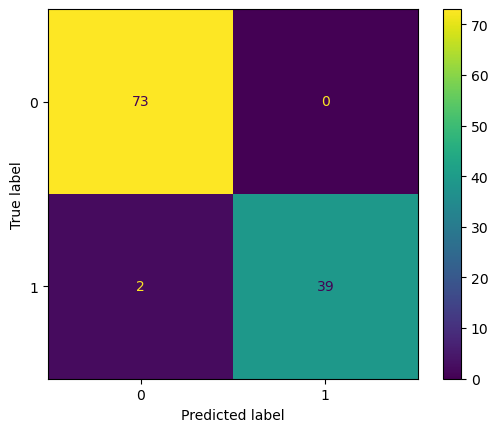

In [19]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

Train results: 19 predictions where the model missed a malignant case and 0 cases where the model predicted cancer where the was none.
Test results: 5 predictions where the model misclassified malignant records and 2 cases where the model predicted a cancer where there was none.

### Performance Metrics

In [ ]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [ ]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

In [ ]:
y_train_vs_predicted # train labels

In [ ]:
y_test_vs_predicted # test labels